This project is focused on sports analytics. This data set is made available by http://www.baseball-reference.com. It contains data about professional baseball (MLB) games played in the 2016 season. There are 2,427 games in the data set. Each row represents a single game. The goal is to predict the attendance at a home team’s game. This is an important task because most franchises want to predict the number of attendees for a variety of reasons including profits.

## Description of Variables

The description of variables are provided in "Baseball - Data Dictionary.docx"

## Goal

Build a model to predict **attendance**

## Data Prep

In [129]:
import numpy as np 
import pandas as pd
np.random.seed(34360082)

In [130]:
baseball= pd.read_csv('baseball.csv')
baseball.head()

,attendance_binary,previous_attendance,previous_away_team_errors,previous_away_team_hits,previous_away_team_runs,game_type,previous_game_type,previous_home_team_errors,previous_home_team_hits,previous_home_team_runs,game_day,previous_game_day,temperature,wind_speed,sky,previous_game_duration,previous_homewin
0,0,43683,2,6,2,Night Game,Day Game,0,6,6,Wednesday,Monday,55,24,Overcast,2.933333,1
1,0,45785,0,7,2,Night Game,Day Game,0,10,3,Wednesday,Monday,48,7,Unknown,2.800000,1
2,0,48282,0,8,4,Night Game,Day Game,2,4,3,Wednesday,Monday,65,10,Cloudy,3.383333,0
3,0,21830,0,9,6,Day Game,Night Game,0,15,11,Wednesday,Tuesday,77,0,In Dome,3.233333,1
4,0,49289,2,4,2,Night Game,Day Game,1,1,3,Tuesday,Monday,81,12,Cloudy,2.633333,1


In [131]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(baseball,test_size=0.3)

In [132]:
train.isna().sum()

attendance_binary            0
previous_attendance          0
previous_away_team_errors    0
previous_away_team_hits      0
previous_away_team_runs      0
game_type                    0
previous_game_type           0
previous_home_team_errors    0
previous_home_team_hits      0
previous_home_team_runs      0
game_day                     0
previous_game_day            0
temperature                  0
wind_speed                   0
sky                          0
previous_game_duration       0
previous_homewin             0
dtype: int64

In [133]:
test.isna().sum()

attendance_binary            0
previous_attendance          0
previous_away_team_errors    0
previous_away_team_hits      0
previous_away_team_runs      0
game_type                    0
previous_game_type           0
previous_home_team_errors    0
previous_home_team_hits      0
previous_home_team_runs      0
game_day                     0
previous_game_day            0
temperature                  0
wind_speed                   0
sky                          0
previous_game_duration       0
previous_homewin             0
dtype: int64

In [134]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [135]:
train_y=train[['attendance_binary']]
test_y=test[['attendance_binary']]

train_inputs=train.drop(['attendance_binary'],axis=1)
test_inputs=test.drop(['attendance_binary'],axis=1)

In [136]:
train_inputs.dtypes

previous_attendance            int64
previous_away_team_errors      int64
previous_away_team_hits        int64
previous_away_team_runs        int64
game_type                     object
previous_game_type            object
previous_home_team_errors      int64
previous_home_team_hits        int64
previous_home_team_runs        int64
game_day                      object
previous_game_day             object
temperature                    int64
wind_speed                     int64
sky                           object
previous_game_duration       float64
previous_homewin               int64
dtype: object

In [137]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

# Idetify the Binary columns
binary_columns = ['previous_homewin']


In [138]:
numeric_columns.remove(binary_columns[0])

In [139]:
numeric_columns

['previous_attendance',
 'previous_away_team_errors',
 'previous_away_team_hits',
 'previous_away_team_runs',
 'previous_home_team_errors',
 'previous_home_team_hits',
 'previous_home_team_runs',
 'temperature',
 'wind_speed',
 'previous_game_duration']

In [140]:
categorical_columns

['game_type', 'previous_game_type', 'game_day', 'previous_game_day', 'sky']

In [141]:
binary_columns

['previous_homewin']

## Pipeline

In [142]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [143]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [144]:
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

In [145]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('binary', binary_transformer, binary_columns)],
        remainder='passthrough')


## Using fit_transform() for TRAIN

In [146]:
train_x = preprocessor.fit_transform(train_inputs)

train_x

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


array([[-1.45832469,  0.52058923,  0.34937435, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.70136076, -0.73682259, -0.22104646, ...,  0.        ,
         0.        ,  0.        ],
       [-0.292085  ,  3.03541287, -1.36188809, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.25812171, -0.73682259, -0.79146727, ...,  0.        ,
         1.        ,  0.        ],
       [-1.74121898, -0.73682259, -1.64709849, ...,  0.        ,
         1.        ,  1.        ],
       [-1.40777932, -0.73682259,  1.49021597, ...,  0.        ,
         0.        ,  1.        ]])

In [147]:
train_x.shape

(1698, 37)

## Using transform() for TEST

In [148]:
test_x = preprocessor.transform(test_inputs)

test_x

array([[ 1.10290748e+00, -7.36822591e-01,  6.34584754e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.99136980e-04,  1.77800105e+00, -2.21751930e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-7.53985845e-01, -7.36822591e-01,  6.41639428e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.14875211e-01,  1.77800105e+00,  1.49021597e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-4.61302137e-01,  5.20589228e-01, -7.91467274e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.36988082e-01, -7.36822591e-01, -5.06256868e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [149]:
test_x.shape

(729, 37)

## Find the Baseline

In [150]:
train_y.value_counts()

attendance_binary
1                    891
0                    807
dtype: int64

In [151]:
train_y.value_counts()/len(train_y)

attendance_binary
1                    0.524735
0                    0.475265
dtype: float64


### The Majority Class for attendance binary is '1', so the baseline accuracy is 0.524735 or approximately 52%


                                                                        
                                                                                                                         
.

### SVM Model 1 : SVC Linear Model

In [152]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=10)

svm_clf.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10)

## Accuracy for Model 1

In [153]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

In [154]:
train_y_pred = svm_clf.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.8380447585394581

In [155]:
test_y_pred = svm_clf.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.8271604938271605

### Determining False Positive Rate and True positive rate for Auc-Roc Curve

In [156]:
svm1_auc = roc_auc_score(test_y, test_y_pred)
svm1_fpr, svm1_tpr, _ = roc_curve(test_y, test_y_pred)

## SVM Model 2: SVC(kernel='poly') :

In [157]:
from sklearn.svm import SVC

# You need to enter a value for gamma. Remember, gamma controls the shape of the bell curve for rbf
# You can also set it is as gamma='scale'. This will be the default option in future releases

pol_svm2 = SVC(kernel="poly", degree=2, coef0=1, C=10, gamma='scale')

pol_svm2.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, coef0=1, degree=2, kernel='poly')

## Accuracy for Model 2

In [158]:
train_y_pred = pol_svm2.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.8981154299175501

In [159]:
test_y_pred = pol_svm2.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.8120713305898491

## Changing value of 'C' to 1

In [160]:
pol_svm3 = SVC(kernel="poly", degree=2, coef0=1, C=1, gamma='scale')

pol_svm3.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, coef0=1, degree=2, kernel='poly')

In [161]:
train_y_pred = pol_svm3.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.8674911660777385

In [162]:
test_y_pred = pol_svm3.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.8299039780521262

## Changing value of 'C' to 0.01

In [163]:
pol_svm4 = SVC(kernel="poly", degree=2, coef0=1, C=0.01, gamma='scale')

pol_svm4.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, coef0=1, degree=2, kernel='poly')

In [164]:
train_y_pred = pol_svm4.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.8303886925795053

In [165]:
test_y_pred = pol_svm4.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.8189300411522634

### Determining False Positive Rate and True positive rate for Auc-Roc Curve

In [166]:
svm2_auc = roc_auc_score(test_y, test_y_pred)
svm2_fpr, svm2_tpr, _ = roc_curve(test_y, test_y_pred)

## SVM Model 3:SVC(kernel='rbf'):

In [167]:
rbf_svm = SVC(kernel="rbf", C=10, gamma='scale')

rbf_svm.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10)

## Accuracy for Model 3

In [168]:
train_y_pred = rbf_svm.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.9711425206124853

In [169]:
test_y_pred = rbf_svm.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.7928669410150891

## Changing value of 'C' to 1

In [170]:
rbf_svm1 = SVC(kernel="rbf", C=1, gamma='scale')

rbf_svm1.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1)

In [171]:
train_y_pred = rbf_svm1.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.8881036513545347

In [172]:
test_y_pred = rbf_svm1.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.8244170096021948

## Changing value of 'C' to 0.07

In [173]:
rbf_svm2 = SVC(kernel="rbf", C=0.07, gamma='scale')

rbf_svm2.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.07)

In [174]:
train_y_pred = rbf_svm2.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.8374558303886925

In [175]:
test_y_pred = rbf_svm2.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.8203017832647462

### Determining False Positive Rate and True positive rate for Auc-Roc Curve

In [176]:
svm3_auc = roc_auc_score(test_y, test_y_pred)
svm3_fpr, svm3_tpr, _ = roc_curve(test_y, test_y_pred)

## SGD Model 1:

In [177]:
from sklearn.linear_model import SGDClassifier 

# tol = stopping criterion
# eta0 = learning rate
# penalty = regularization term
# max_iter = number of passes over training data (i.e., epochs)

sgd_logreg = SGDClassifier(max_iter=100, penalty=None, eta0=0.1, tol=0.0001) 

sgd_logreg.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(eta0=0.1, max_iter=100, penalty=None, tol=0.0001)

## Accuracy for SGD Model 1

In [178]:
train_y_pred = sgd_logreg.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.823321554770318

In [179]:
#Predict the test values
test_y_pred = sgd_logreg.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8106995884773662


### Determining False Positive Rate and True positive rate for Auc-Roc Curve

In [180]:
sgd1_auc = roc_auc_score(test_y, test_y_pred)
sgd1_fpr, sgd1_tpr, _ = roc_curve(test_y, test_y_pred)

## SGD Model 2:

In [181]:
from sklearn.linear_model import SGDClassifier 

# tol = stopping criterion
# eta0 = learning rate
# penalty = regularization term
# max_iter = number of passes over training data (i.e., epochs)

sgd_logreg2 = SGDClassifier(max_iter=100,penalty='l2',eta0=0.1, tol=0.0001) 

sgd_logreg2.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(eta0=0.1, max_iter=100, tol=0.0001)

## Accuracy for SGD Model 2

In [182]:
train_y_pred = sgd_logreg2.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.8186101295641932

In [183]:
test_y_pred = sgd_logreg2.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.8257887517146777

### Determining False Positive Rate and True positive rate for Auc-Roc Curve

In [184]:
sgd2_auc = roc_auc_score(test_y, test_y_pred)
sgd2_fpr, sgd2_tpr, _ = roc_curve(test_y, test_y_pred)

## LogisticRegression Model:

In [185]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='none')

log_reg.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

## Accuracy for Log Regression Model

In [186]:
train_y_pred = log_reg.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.8386336866902238

In [187]:
test_y_pred = log_reg.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.8285322359396433

## Regularization

In [188]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.5)

log_reg.fit(train_x, train_y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [189]:
train_y_pred = log_reg.predict(train_x)

accuracy_score(train_y, train_y_pred)

0.8374558303886925

In [190]:
test_y_pred = log_reg.predict(test_x)

accuracy_score(test_y, test_y_pred)

0.8299039780521262

### Determining False Positive Rate and True positive rate for Auc-Roc Curve

In [191]:
log_auc = roc_auc_score(test_y, test_y_pred)
log_fpr, log_tpr, _ = roc_curve(test_y, test_y_pred)

## Listing the train and test values of each model you built 

## PLotting AUC-ROC curve for all the models

In [193]:
import matplotlib.pyplot as plt

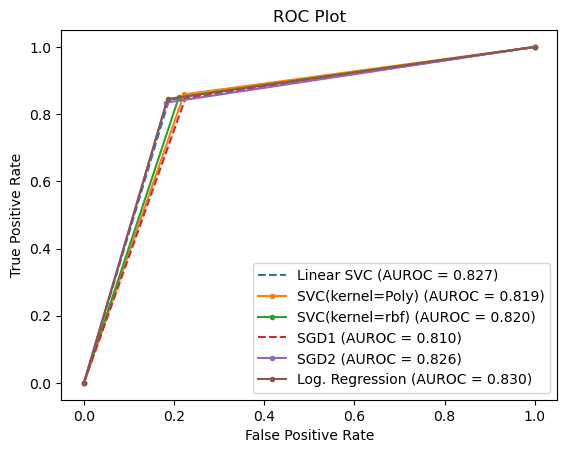

In [194]:
plt.plot(svm1_fpr, svm1_tpr, linestyle='--', label='Linear SVC (AUROC = %0.3f)' % svm1_auc)
plt.plot(svm2_fpr, svm2_tpr, marker='.', label='SVC(kernel=Poly) (AUROC = %0.3f)' % svm2_auc)
plt.plot(svm3_fpr, svm3_tpr, marker='.', label='SVC(kernel=rbf) (AUROC = %0.3f)' % svm3_auc)
plt.plot(sgd1_fpr, sgd1_tpr, linestyle='--', label='SGD1 (AUROC = %0.3f)' % sgd1_auc)
plt.plot(sgd2_fpr, sgd2_tpr, marker='.', label='SGD2 (AUROC = %0.3f)' % sgd2_auc)
plt.plot(log_fpr, log_tpr, marker='.', label='Log. Regression (AUROC = %0.3f)' % log_auc)
 

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Interpretation

### Comparing the accuracy, Logistic Regression model performs the best with accuracy of **~ 83 %**
### Comparing the Area Under the Curve, Logistic Regression model has best Area Under the Curve (0.83)
### Thus, Logistic Regression Model can used to predict attendance for the home team